## Canny Edge Detection

Canny Edge Detection is a popular edge detection algorithm. The Canny operator was designed to be an optimal edge detector. It takes as input a gray scale image, and produces as output an image showing the positions of tracked intensity discontinuities.

**Setup**
- open Anaconda Prompt
- Downgrade Python version by typing "conda install python=3.5
- Type "conda install -c menpo opencv3"

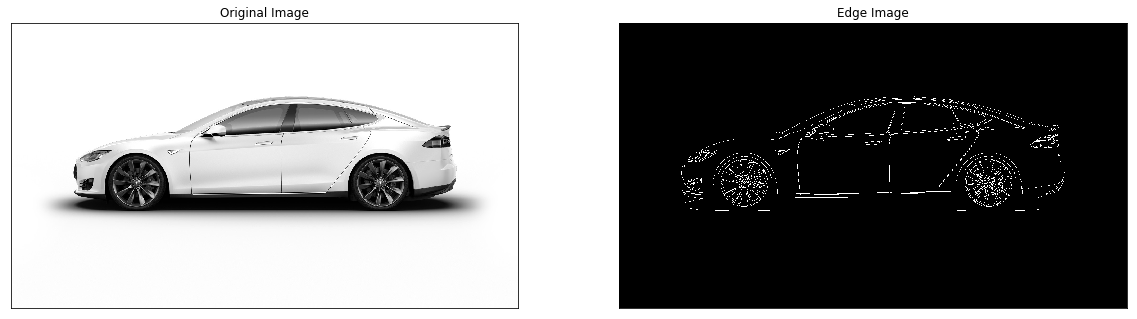

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('tesla.jpg',0) 
edges = cv2.Canny(img,100,200)

plt.figure(figsize=(20,15))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

URL to Tesla image: https://www.tesla.com/configurator/compositor/?model=ms&view=STUD_SIDE&size=1920&bkba_opt=2&file_type=jpg&options=MS01,RENA,AF00,AU00,BC0B,BP01,BR00,BS00,CDM0,CH00,COL1-PBCW,CW02,DA02,DCF0,DRLH,DSH5,DV4W,FG00,HP00,IDHG,IX00,LP00,ME02,MI00,PA00,PF01,PI00,PK00,PS01,PX00,PX4D,QNLB,RFP2,SC01,SP00,SR01,ST02,SU00,TM00,TP00,TR00,UTAW,WTSG,WTX0,X002,X003,X007,X011,X014,X019,X024,X026,X028,X031,X037,X040,X044,YFFC

# Corner detection (NUS T-shirt)

NUS T-shirt: https://images-na.ssl-images-amazon.com/images/I/61tBveLt-2L._UL1500_.jpg

In [1]:
import cv2
import numpy as np

filename = 'nus_tshirt.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

# Live Video Edge Detection

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('Original',frame)
    edges = cv2.Canny(frame,100,200)
    cv2.imshow('Edges',edges)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

# Live Video Gradient Detection

In [2]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    laplacian = cv2.Laplacian(frame,cv2.CV_64F)
    sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)

    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('laplacian',laplacian)
    cv2.imshow('sobelx',sobelx)
    cv2.imshow('sobely',sobely)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()